#Environment Verification

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.17.1


#Data Preparation

In [ ]:
#https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset?select=Training
#Unzip the Dataset
!unzip brain-tumor-mri-dataset.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/Training/glioma/Tr-gl_0712.jpg  
  inflating: data/Training/glioma/Tr-gl_0713.jpg  
  inflating: data/Training/glioma/Tr-gl_0714.jpg  
  inflating: data/Training/glioma/Tr-gl_0715.jpg  
  inflating: data/Training/glioma/Tr-gl_0716.jpg  
  inflating: data/Training/glioma/Tr-gl_0717.jpg  
  inflating: data/Training/glioma/Tr-gl_0718.jpg  
  inflating: data/Training/glioma/Tr-gl_0719.jpg  
  inflating: data/Training/glioma/Tr-gl_0720.jpg  
  inflating: data/Training/glioma/Tr-gl_0721.jpg  
  inflating: data/Training/glioma/Tr-gl_0722.jpg  
  inflating: data/Training/glioma/Tr-gl_0723.jpg  
  inflating: data/Training/glioma/Tr-gl_0724.jpg  
  inflating: data/Training/glioma/Tr-gl_0725.jpg  
  inflating: data/Training/glioma/Tr-gl_0726.jpg  
  inflating: data/Training/glioma/Tr-gl_0727.jpg  
  inflating: data/Training/glioma/Tr-gl_0728.jpg  
  inflating: data/Training/glioma/Tr-gl_0729.jpg  
  inflating: data/Training/glio

In [ ]:
!ls data

Testing  Training


In [ ]:
!ls data/Training
!ls data/Testing

glioma	meningioma  notumor  pituitary
glioma	meningioma  notumor  pituitary


In [ ]:
#To perform binary classification (Tumor vs. No Tumor), we'll consolidate the three tumor types into a single Tumor class and keep No Tumor as is.
import os

# Define new directory paths
binary_train_dir = 'data/Binary_Training'
binary_val_dir = 'data/Binary_Validation'
binary_test_dir = 'data/Binary_Testing'

# Create directories
os.makedirs(os.path.join(binary_train_dir, 'Tumor'), exist_ok=True)
os.makedirs(os.path.join(binary_train_dir, 'No_Tumor'), exist_ok=True)

os.makedirs(os.path.join(binary_val_dir, 'Tumor'), exist_ok=True)
os.makedirs(os.path.join(binary_val_dir, 'No_Tumor'), exist_ok=True)

os.makedirs(os.path.join(binary_test_dir, 'Tumor'), exist_ok=True)
os.makedirs(os.path.join(binary_test_dir, 'No_Tumor'), exist_ok=True)


In [ ]:
#We'll copy images from glioma, meningioma, and pituitary into the Tumor class, and notumor into the No_Tumor class.
import shutil

# Define source directories
source_train_dirs = ['glioma', 'meningioma', 'pituitary']
source_test_dirs = ['glioma', 'meningioma', 'pituitary']

# Function to copy images
def copy_images(source_parent, source_dirs, dest_dir):
    for src_dir in source_dirs:
        src_path = os.path.join(source_parent, src_dir)
        for fname in os.listdir(src_path):
            if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                src_file = os.path.join(src_path, fname)
                shutil.copy(src_file, dest_dir)

# Copy Tumor images for Training
copy_images('data/Training', source_train_dirs, os.path.join(binary_train_dir, 'Tumor'))

# Copy No_Tumor images for Training
source_no_tumor_train = os.path.join('data/Training', 'notumor')
for fname in os.listdir(source_no_tumor_train):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        src_file = os.path.join(source_no_tumor_train, fname)
        shutil.copy(src_file, os.path.join(binary_train_dir, 'No_Tumor'))

# Copy Tumor images for Testing
copy_images('data/Testing', source_test_dirs, os.path.join(binary_test_dir, 'Tumor'))

# Copy No_Tumor images for Testing
source_no_tumor_test = os.path.join('data/Testing', 'notumor')
for fname in os.listdir(source_no_tumor_test):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        src_file = os.path.join(source_no_tumor_test, fname)
        shutil.copy(src_file, os.path.join(binary_test_dir, 'No_Tumor'))

In [ ]:
#Create a Validation Set from Training Data
#Since the dataset only provides Training and Testing, we'll split a portion of the Training data into Validation.

import numpy as np

# Define paths
val_split_ratio = 0.2  # 20% for validation

def create_validation_split(source_dir, dest_dir, split_ratio=0.2):
    classes = ['Tumor', 'No_Tumor']
    for cls in classes:
        src_cls_dir = os.path.join(source_dir, cls)
        dest_cls_dir = os.path.join(dest_dir, cls)
        files = [f for f in os.listdir(src_cls_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        np.random.shuffle(files)
        val_count = int(len(files) * split_ratio)
        val_files = files[:val_count]
        for f in val_files:
            src_file = os.path.join(src_cls_dir, f)
            dst_file = os.path.join(dest_cls_dir, f)
            shutil.move(src_file, dst_file)

# Create Validation directories
os.makedirs(os.path.join(binary_val_dir, 'Tumor'), exist_ok=True)
os.makedirs(os.path.join(binary_val_dir, 'No_Tumor'), exist_ok=True)

# Split the data
create_validation_split(binary_train_dir, binary_val_dir, split_ratio=val_split_ratio)

In [ ]:
#Final Directory Structure Verification

# Verify Training Tumor
print("Training Tumor Samples:")
!ls data/Binary_Training/Tumor | head

# Verify Training No_Tumor
print("\nTraining No_Tumor Samples:")
!ls data/Binary_Training/No_Tumor | head

# Verify Validation Tumor
print("\nValidation Tumor Samples:")
!ls data/Binary_Validation/Tumor | head

# Verify Validation No_Tumor
print("\nValidation No_Tumor Samples:")
!ls data/Binary_Validation/No_Tumor | head

# Verify Testing Tumor
print("\nTesting Tumor Samples:")
!ls data/Binary_Testing/Tumor | head

# Verify Testing No_Tumor
print("\nTesting No_Tumor Samples:")
!ls data/Binary_Testing/No_Tumor | head

Training Tumor Samples:
Tr-gl_0012.jpg
Tr-gl_0013.jpg
Tr-gl_0014.jpg
Tr-gl_0015.jpg
Tr-gl_0016.jpg
Tr-gl_0017.jpg
Tr-gl_0018.jpg
Tr-gl_0019.jpg
Tr-gl_0020.jpg
Tr-gl_0021.jpg

Training No_Tumor Samples:
Tr-no_0011.jpg
Tr-no_0014.jpg
Tr-no_0015.jpg
Tr-no_0016.jpg
Tr-no_0017.jpg
Tr-no_0018.jpg
Tr-no_0022.jpg
Tr-no_0024.jpg
Tr-no_0025.jpg
Tr-no_0026.jpg

Validation Tumor Samples:
Tr-gl_0010.jpg
Tr-gl_0011.jpg
Tr-gl_0023.jpg
Tr-gl_0024.jpg
Tr-gl_0031.jpg
Tr-gl_0035.jpg
Tr-gl_0039.jpg
Tr-gl_0041.jpg
Tr-gl_0042.jpg
Tr-gl_0047.jpg

Validation No_Tumor Samples:
Tr-no_0010.jpg
Tr-no_0012.jpg
Tr-no_0013.jpg
Tr-no_0019.jpg
Tr-no_0020.jpg
Tr-no_0021.jpg
Tr-no_0023.jpg
Tr-no_0030.jpg
Tr-no_0034.jpg
Tr-no_0037.jpg

Testing Tumor Samples:
Te-gl_0010.jpg
Te-gl_0011.jpg
Te-gl_0012.jpg
Te-gl_0013.jpg
Te-gl_0014.jpg
Te-gl_0015.jpg
Te-gl_0016.jpg
Te-gl_0017.jpg
Te-gl_0018.jpg
Te-gl_0019.jpg

Testing No_Tumor Samples:
Te-no_0010.jpg
Te-no_0011.jpg
Te-no_0012.jpg
Te-no_0013.jpg
Te-no_0014.jpg
Te-no_0015.jpg


#Data Augmentation and Data Generators

In [ ]:
# Import Necessary Libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**The parameters for your data processing and model training.**

In [ ]:
# Parameters
BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # Input size for EfficientNetB0
EPOCHS = 20
BASE_LEARNING_RATE = 1e-3
FINE_TUNE_LEARNING_RATE = 1e-5
DATA_DIR = 'data'  # Base directory for data

In [ ]:
# We'll use Keras' ImageDataGenerator to handle data loading and augmentation.
# Training data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,            # Random rotations
    width_shift_range=0.1,        # Horizontal shifts
    height_shift_range=0.1,       # Vertical shifts
    zoom_range=0.1,               # Zooming
    horizontal_flip=True,         # Horizontal flipping
    fill_mode='nearest'           # Filling strategy
)

# Validation data should not be augmented, only rescaled
val_datagen = ImageDataGenerator(rescale=1./255)

# Testing data should only be rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Use the flow_from_directory method to load images from the directories.

# Paths to the directories
train_dir = os.path.join(DATA_DIR, 'Binary_Training')
val_dir = os.path.join(DATA_DIR, 'Binary_Validation')
test_dir = os.path.join(DATA_DIR, 'Binary_Testing')

# Training generator with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification
)

# Validation generator without augmentation
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # No shuffling for validation
)

# Testing generator without augmentation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # No shuffling for testing
)

Found 4570 images belonging to 2 classes.
Found 1142 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


**Visualizing augmented images helps in understanding the transformations being applied.**

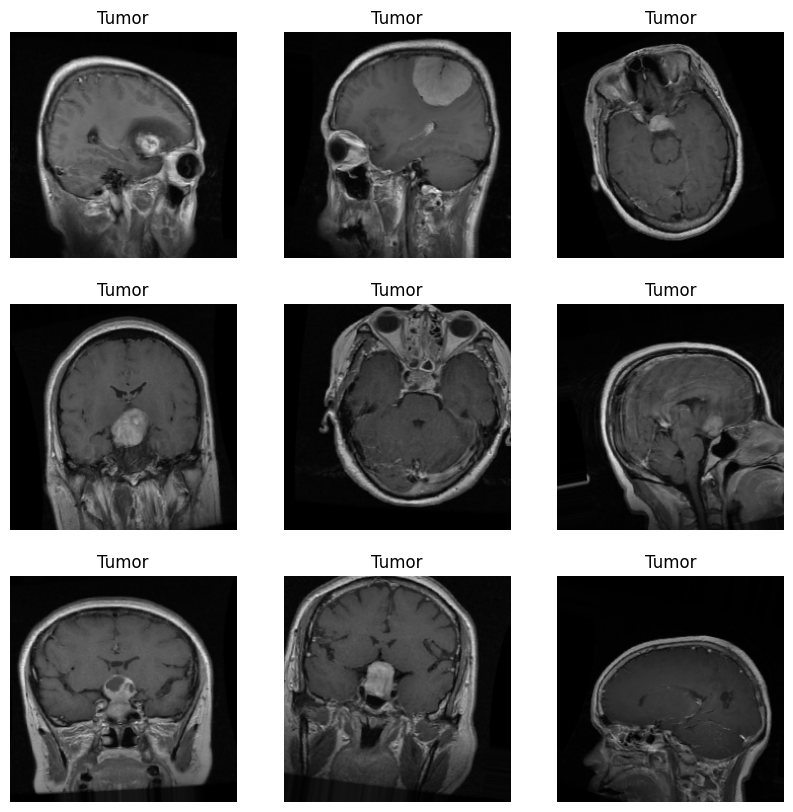

In [ ]:
# Fetch a batch of training data
x_batch, y_batch = next(train_generator)

# Plot the first 9 images in the batch
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title("Tumor" if y_batch[i] == 1 else "No Tumor")
    plt.axis("off")
plt.show()

In [ ]:
#Verify Class Indices

print("Class Indices:", train_generator.class_indices)

Class Indices: {'No_Tumor': 0, 'Tumor': 1}


In [ ]:
#Check the Number of Samples

print(f"Number of Training Samples: {train_generator.samples}")
print(f"Number of Validation Samples: {val_generator.samples}")
print(f"Number of Testing Samples: {test_generator.samples}")

Number of Training Samples: 4570
Number of Validation Samples: 1142
Number of Testing Samples: 1311


#Building the Deep Learning Model

In [ ]:
#We'll use Transfer Learning with a pre-trained model to leverage existing features and fine-tune them for your specific task. This approach typically results in faster convergence and better performance, especially when working with limited datasets.

#We'll use EfficientNetB0, a state-of-the-art model known for its efficiency and performance.

#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#Define Model Parameters

# Parameters
IMG_SIZE = (224, 224)  # Input size for EfficientNetB0
BATCH_SIZE = 32
EPOCHS = 20
BASE_LEARNING_RATE = 1e-3
FINE_TUNE_LEARNING_RATE = 1e-5
DATA_DIR = 'data'  # Base directory for data

**Build the Model Using Transfer Learning**

In [ ]:
#We'll use EfficientNetB0 as the base model. This model is pretrained on ImageNet and provides a strong starting point for feature extraction.

# Load the EfficientNetB0 model without the top classification layers
base_model = EfficientNetB0(
    weights='imagenet',      # Use ImageNet weights
    include_top=False,       # Exclude the top (classification) layers
    input_shape=(*IMG_SIZE, 3)
)

# Freeze the base model to prevent its weights from being updated during initial training
base_model.trainable = False

# Build the model
inputs = tf.keras.Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)  # Pass inputs through the base model
x = layers.GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensionality
x = layers.Dropout(0.4)(x)               # Dropout for regularization
outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification output

model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=BASE_LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

**Set Up Callbacks**

In [ ]:
#Callbacks help monitor and control the training process.

# EarlyStopping to stop training when validation loss stops improving
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=5,                # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# ReduceLROnPlateau to reduce learning rate when a metric has stopped improving
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',        # Monitor validation loss
    factor=0.5,                # Factor by which the learning rate will be reduced
    patience=2,                # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1
)

#**Train the Model**

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 488ms/step - accuracy: 0.7050 - loss: 0.6193 - val_accuracy: 0.7207 - val_loss: 0.5919 - learning_rate: 0.0010
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.7263 - loss: 0.5869 - val_accuracy: 0.7207 - val_loss: 0.5916 - learning_rate: 0.0010
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 345ms/step - accuracy: 0.7114 - loss: 0.6035 - val_accuracy: 0.7207 - val_loss: 0.5921 - learning_rate: 0.0010
Epoch 4/20
140/143 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 0.7211 - loss: 0.5939
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 345ms/step - accuracy: 0.7211 - loss: 0.5939 - val_accuracy: 0.7207 - val_loss: 0.5918 - learning_rate: 0.0010
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 347ms/step - accuracy: 0.7206 - loss: 0.5929 - val_accuracy: 0.7207 - val_loss: 0.5915 - learning_rate: 5.0000e-04
Epoch 6/20
140/143 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.7164 - loss

In [ ]:
#After initial training, unfreeze some layers of the base model to fine-tune the model with a lower learning rate.

# Unfreeze some layers of the base model for fine-tuning
fine_tune_at = len(base_model.layers) // 2  # Unfreeze the top half of the layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=FINE_TUNE_LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture again to see which layers are trainable
model.summary()

# Continue training the model
fine_tune_epochs = 10  # Number of epochs for fine-tuning
total_epochs = EPOCHS + fine_tune_epochs

fine_tune_history = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 3,700,169 (14.12 MB)

 Non-trainable params: 350,683 (1.34 MB)

Epoch 20/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 126s 562ms/step - accuracy: 0.4778 - loss: 0.8676 - val_accuracy: 0.7207 - val_loss: 0.6319 - learning_rate: 1.0000e-05
Epoch 21/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 347ms/step - accuracy: 0.8223 - loss: 0.4677 - val_accuracy: 0.7452 - val_loss: 0.5802 - learning_rate: 1.0000e-05
Epoch 22/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.8354 - loss: 0.4242 - val_accuracy: 0.8783 - val_loss: 0.5131 - learning_rate: 1.0000e-05
Epoch 23/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 347ms/step - accuracy: 0.8336 - loss: 0.4181 - val_accuracy: 0.3800 - val_loss: 0.7069 - learning_rate: 1.0000e-05
Epoch 24/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 347ms/step - accuracy: 0.8424 - loss: 0.3980 - val_accuracy: 0.8450 - val_loss: 0.5110 - learning_rate: 1.0000e-05
Epoch 25/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.8474 - loss: 0.3802 - val_accuracy: 0.8275 - val_loss: 0.5284 - learning_rate: 1.0000e-05
Epoch 26/30
143/143 ━━━━━━━━━━━━━━━━━━━

#Plot Training and Validation Metrics

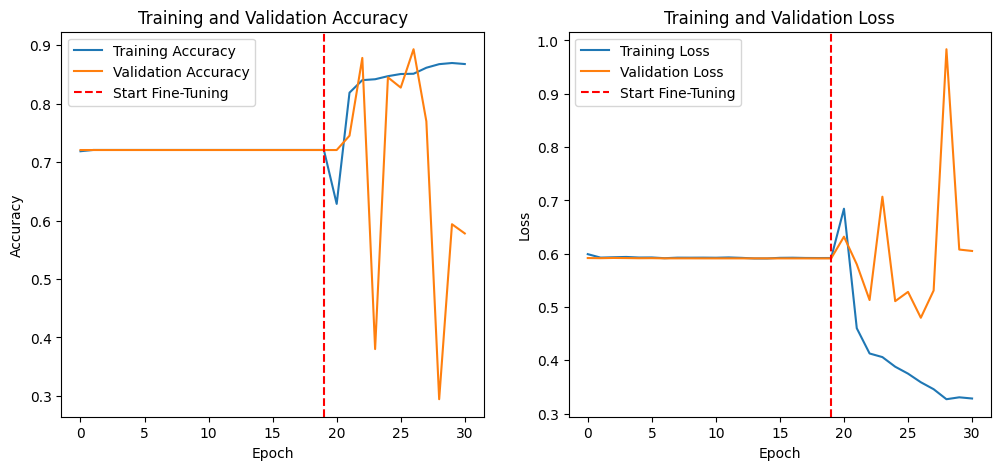

In [ ]:
# Combine histories from initial training and fine-tuning
acc = history.history['accuracy'] + fine_tune_history.history.get('accuracy', [])
val_acc = history.history['val_accuracy'] + fine_tune_history.history.get('val_accuracy', [])
loss = history.history['loss'] + fine_tune_history.history.get('loss', [])
val_loss = history.history['val_loss'] + fine_tune_history.history.get('val_loss', [])

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(x=history.epoch[-1], color='r', linestyle='--', label='Start Fine-Tuning')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(x=history.epoch[-1], color='r', linestyle='--', label='Start Fine-Tuning')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Evaluating the Model

In [ ]:
#Evaluate the Model on Test Data
#First, let's evaluate the model using the test_generator to obtain the loss and accuracy on the test dataset.

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.8196 - loss: 0.4652
Test Loss: 0.5402
Test Accuracy: 0.8398


In [ ]:
#Generate Predictions on Test Data

# Reset the test generator before making predictions
test_generator.reset()

# Predict probabilities for the test set
pred_probs = model.predict(test_generator, verbose=1)

# Convert probabilities to binary class labels
pred_classes = (pred_probs > 0.5).astype(int).reshape(-1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())
print(f"Class Labels: {class_labels}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step
Class Labels: ['No_Tumor', 'Tumor']


#Compute Evaluation Metrics

In [ ]:
#We'll use scikit-learn to calculate Precision, Recall, F1-Score, and AUC.

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:")
print(cm)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_classes, pred_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

    No_Tumor       0.69      0.86      0.77       405
       Tumor       0.93      0.83      0.88       906

    accuracy                           0.84      1311
   macro avg       0.81      0.85      0.82      1311
weighted avg       0.86      0.84      0.84      1311

Confusion Matrix:
[[349  56]
 [154 752]]
AUC: 0.9126


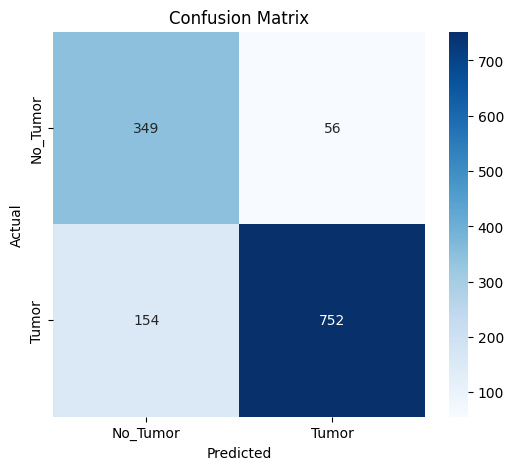

In [ ]:
#Visualize the Confusion Matrix
#A Confusion Matrix provides a visual representation of the model's performance across classes.

import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

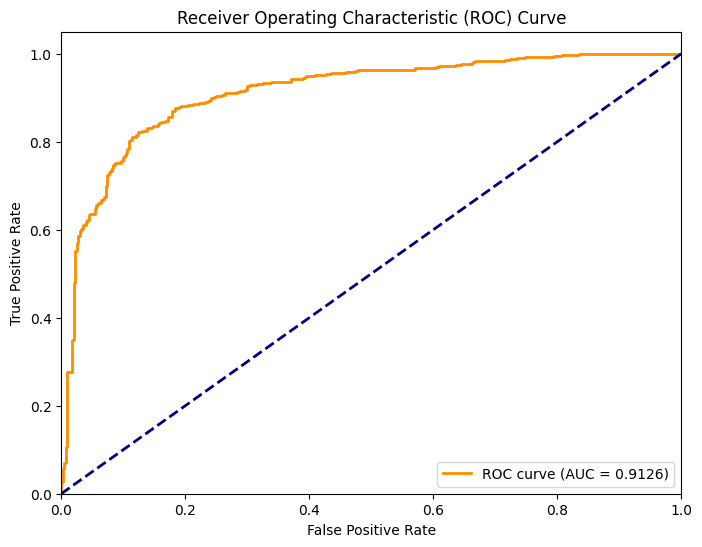

In [ ]:
#Plot the ROC Curve
#The ROC Curve illustrates the diagnostic ability of the binary classifier system as its discrimination threshold is varied.

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Save the Trained Model

In [ ]:
# Save the entire model to a HDF5 file
model.save('brain_tumor_detection_model.h5')
print("Model saved as 'brain_tumor_detection_model.h5'")

Model saved as 'brain_tumor_detection_model.h5'


# Manually Testing

*You do not need to run the full code to test the model. The Model is already saved. Just load the model. Complete code for testing the model is shown below.*

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('brain_tumor_detection_model.h5')
print("Model loaded successfully.")

In [ ]:
#Load Image

from google.colab import files
import os

# Create a directory to store new images
os.makedirs('new_images', exist_ok=True)

# Upload images
uploaded = files.upload()

# Move uploaded files to 'new_images' directory
for filename in uploaded.keys():
    os.rename(filename, os.path.join('new_images', filename))

print("Images uploaded and moved to 'new_images/' directory.")

*Alternative*

In [ ]:
# Alternatively you can access images from Google

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the path to your new images in Drive
# Replace 'path_to_new_images' with your actual path
new_images_path = '/content/gdrive/MyDrive/path_to_new_images'

# Copy images to Colab's local directory
!cp /content/gdrive/MyDrive/path_to_new_images/* new_images/

In [ ]:
#List the images to ensure they've been uploaded correctly
!ls new_images

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

#Use the same image size and scaling as during training
IMG_SIZE = (224, 224)  # Must match the size used during training

#Preprocess and Predict
def load_and_preprocess_image(img_path, img_size=IMG_SIZE):
    """
    Loads an image from disk, resizes it, and scales the pixel values.
    """
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Scale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image(model, img_path):
    """
    Makes a prediction on a single image and returns the class label and probability.
    """
    img = load_and_preprocess_image(img_path)
    pred_prob = model.predict(img)[0][0]
    pred_class = 'Tumor' if pred_prob > 0.5 else 'No Tumor'
    return pred_class, pred_prob

# Directory containing new images
new_images_dir = 'new_images'

# Get list of new image file paths
new_image_files = [os.path.join(new_images_dir, fname) for fname in os.listdir(new_images_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Iterate over each image and make predictions
for img_path in new_image_files:
    pred_class, pred_prob = predict_image(model, img_path)
    print(f"Image: {img_path} --> Prediction: {pred_class} (Probability: {pred_prob:.4f})")


In [ ]:
#Visualize Predictions

def visualize_prediction(model, img_path, img_size=IMG_SIZE):
    """
    Displays the image and its prediction.
    """
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    pred_prob = model.predict(img_array_expanded)[0][0]
    pred_class = 'Tumor' if pred_prob > 0.5 else 'No Tumor'

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class} ({pred_prob:.4f})")
    plt.axis('off')
    plt.show()

# Visualize all predictions
for img_path in new_image_files:
    visualize_prediction(model, img_path)